# Análise Exploratória de Dados: Validação do Projeto "AchAí"

**Objetivo:** Este notebook apresenta a análise exploratória dos dados coletados em uma pesquisa de validação para o projeto **"AchAí - Perdeu? AchAí."** da disciplina intercurso do curso Análise e Desenvolvemento de Sistemas.

O projeto visa implantar um sistema digital de achados e perdidos na Unifor, utilizando formulários online e QR codes para agilizar a devolução de itens. O público-alvo é toda a comunidade Unifor, incluindo alunos, professores e funcionários.

Esta análise corresponde à etapa de **"Levantamento de resultados do relatório de validação"** do cronograma do projeto, fundamental para validar o problema e orientar o desenvolvimento da solução.

---
## Sumário Executivo: Principais Insights

A análise dos dados da pesquisa validou com sucesso a necessidade e a aderência da solução "AchAí". Os principais resultados encontrados foram:

* **Problema Validado:** **65%** dos respondentes já perderam itens na universidade, e a principal queixa sobre o serviço atual é a **"Falta de informação"**.
* **Forte Aceitação da Solução:** A solução proposta teve uma excelente recepção, com nota média de **4.6/5 para utilidade** e **4.3/5 para probabilidade de uso**.
* **Direcionamento de Produto:** As funcionalidades mais pedidas foram o **upload de fotos** e as **notificações automáticas**, que devem ser priorizadas no desenvolvimento.
* **Direcionamento Estratégico:** Os **Blocos acadêmicos, Centro de Convivência e Biblioteca** foram apontados como os locais ideais para a instalação de QR Codes.

---

## Configuração do Ambiente e Bibliotecas


In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

## Carregamento dos Dados

In [ ]:
df = pd.read_csv('./dados/pesquisa_de_validacao.csv')

## Inspeção das Dimensões

In [387]:
linhas, colunas = df.shape

print(f"O dataset tem {linhas} linhas.")
print(f"O dataset tem {colunas} colunas.")
print(f"A forma do DataFrame é: {df.shape}")

O dataset tem 48 linhas.
O dataset tem 32 colunas.
A forma do DataFrame é: (48, 32)


## Análise Preliminar

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 32 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Carimbo de data/hora                                                                         48 non-null     object
 1   Seu vínculo com a Unifor                                                                     48 non-null     object
 2   Seu curso                                                                                    46 non-null     object
 3   Turno que mais frequenta o campus - Estudante                                                46 non-null     object
 4   Locais do campus que você mais frequenta  - Estudante                                        46 non-null     object
 5   Seu setor/área/centro                        

In [389]:
df.head()

,Carimbo de data/hora,Seu vínculo com a Unifor,Seu curso,Turno que mais frequenta o campus - Estudante,Locais do campus que você mais frequenta - Estudante,Seu setor/área/centro,Turno que mais frequenta o campus - Colaborador,Locais do campus que você mais frequenta - Colaborador,Você sabia que a Unifor possui um setor de achados e perdidos?,Você sabe onde ele fica?,...,Quão útil essa solução seria para você?,Qual a probabilidade de você usar essa solução quando perder/achar algo?,Quais funcionalidades você mais gostaria?,Como você prefere ser contatado sobre o item?,Qual método de comprovação de propriedade você considera aceitável?,Em quanto tempo você considera “bom” receber um retorno do setor?,Onde seria mais útil ter QR Codes?,Quão importante é existir um achados e perdidos eficiente na Unifor?,Por qual meio/canal de comunicação você prefere ser informado de itens/novidades do serviço,Você deseja ser contatado para participar de testes/piloto?
0,16/09/2025 20:48:29,Aluno,Psicologia,Noite (Noturno),Blocos acadêmicos (Salas de Aula),NaN,NaN,NaN,Sim,Sim,...,4,5,"Upload de foto do item, Mapa/local do achado/p...",WhatsApp,"Descrever características específicas, Foto us...",Até 3 dias,"Biblioteca, Centro de Convivência (CC), Blocos...",5,Site/App da universidade,Sim
1,16/09/2025 21:04:02,Aluno,Engenharia Civil,Noite (Noturno),"Centro de Convivência (CC), Blocos acadêmicos ...",NaN,NaN,NaN,Não,Não,...,5,5,"Upload de foto do item, Notificação quando ite...","WhatsApp, E-mail","Descrever características específicas, Foto us...",Até 24h,"Biblioteca, Centro de Convivência (CC), Blocos...",5,"E-mail institucional, Cartazes/placas",Não
2,16/09/2025 21:07:49,Aluno,Direito,Manhã (Matutino),"Biblioteca, Blocos acadêmicos (Salas de Aula),...",NaN,NaN,NaN,Sim,Sim,...,4,5,"Upload de foto do item, Notificação quando ite...","WhatsApp, App da universidade","Descrever características específicas, Mostrar...",Até 24h,"Centro de Convivência (CC), Laboratórios, Esta...",5,"E-mail institucional, Redes sociais Unifor, Si...",Não
3,16/09/2025 21:15:25,Aluno,Ciência da Computação,Noite (Noturno),Blocos acadêmicos (Salas de Aula),NaN,NaN,NaN,Sim,Sim,...,5,5,"Upload de foto do item, Mapa/local do achado/p...",App da universidade,Foto usando o item,No mesmo dia,"Centro de Convivência (CC), Blocos acadêmicos ...",5,Cartazes/placas,Sim
4,16/09/2025 21:19:40,Aluno,Comércio Exterior,Noite (Noturno),"Centro de Convivência (CC), Blocos acadêmicos ...",NaN,NaN,NaN,Sim,Não,...,5,5,"Upload de foto do item, Mapa/local do achado/p...","E-mail, App da universidade","Descrever características específicas, Foto us...",Até 24h,"Biblioteca, Centro de Convivência (CC), Blocos...",5,"E-mail institucional, Redes sociais Unifor, Si...",Não


In [390]:
df.describe()

,Como você avalia sua experiência com o serviço atual?,Quão útil essa solução seria para você?,Qual a probabilidade de você usar essa solução quando perder/achar algo?,Quão importante é existir um achados e perdidos eficiente na Unifor?
count,48.000000,48.000000,48.000000,48.000000
mean,3.895833,4.583333,4.291667,4.958333
std,1.015614,0.613096,1.009705,0.288675
min,1.000000,3.000000,1.000000,3.000000
25%,3.000000,4.000000,4.000000,5.000000
50%,4.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


In [391]:
df.isnull().sum()

,0
Carimbo de data/hora,0
Seu vínculo com a Unifor,0
Seu curso,2
Turno que mais frequenta o campus - Estudante,2
Locais do campus que você mais frequenta - Estudante,2
Seu setor/área/centro,46
Turno que mais frequenta o campus - Colaborador,46
Locais do campus que você mais frequenta - Colaborador,46
Você sabia que a Unifor possui um setor de achados e perdidos?,0
Você sabe onde ele fica?,0


## 1. Limpeza e Pré-processamento dos Dados

Nesta etapa, vamos preparar os dados para a análise, o que inclui:
1.  Renomear as colunas para facilitar o acesso.
2.  Consolidar colunas específicas de Alunos e Colaboradores em colunas genéricas para uma análise unificada.
3.  Reagrupamento de categorias da coluna 'dificuldades_atuais'

### 1.  Renomear as colunas para facilitar o acesso.

In [392]:
novos_nomes = {
    'Carimbo de data/hora': 'data_hora',
    'Seu vínculo com a Unifor': 'vinculo',
    'Nome completo': 'nome_completo',
    'Seu curso': 'curso',
    'Turno que mais frequenta o campus - Estudante': 'turno_estudante',
    'Locais do campus que você mais frequenta  - Estudante': 'locais_frequentes_estudante',
    'Seu setor/área/centro': 'setor_colaborador',
    'Turno que mais frequenta o campus - Colaborador': 'turno_colaborador',
    'Locais do campus que você mais frequenta - Colaborador': 'locais_frequentes_colaborador',
    'Você sabia que a Unifor possui um setor de achados e perdidos?': 'sabia_setor_existe',
    'Você sabe onde ele fica?': 'sabe_localizacao_setor', 'Como você ficou sabendo desse serviço?': 'como_soube_servico',
    'Você já perdeu algum objeto na universidade?': 'perdeu_objeto', 'Que tipo de item?': 'tipo_item_perdido',
    'No último ano, quantas vezes perdeu algo no campus?': 'frequencia_perda',
    'O que você fez na ocasião mais recente?': 'acao_recente_perda', 'Conseguiu recuperar o item?': 'recuperou_item',
    'Em quanto tempo recebeu retorno?': 'tempo_retorno_perda', 'Você já ENCONTROU algum item perdido no campus?': 'encontrou_objeto',
    'O que fez com o item?': 'acao_encontro_item', 'O que te ajudaria a entregar mais rápido?': 'ajuda_entrega_rapida',
    'Como você avalia sua experiência com o serviço atual?': 'avaliacao_servico_atual',
    'Quais dificuldades você já enfrentou ou acredita que existem?': 'dificuldades_atuais',
    'Quão útil essa solução seria para você?': 'utilidade_solucao',
    'Qual a probabilidade de você usar essa solução quando perder/achar algo?': 'probabilidade_uso_solucao',
    'Quais funcionalidades você mais gostaria?': 'funcionalidades_desejadas',
    'Como você prefere ser contatado sobre o item?': 'metodo_contato',
    'Qual método de comprovação de propriedade você considera aceitável?': 'metodo_comprovacao',
    'Em quanto tempo você considera “bom” receber um retorno do setor?': 'tempo_retorno_ideal',
    'Onde seria mais útil ter QR Codes?': 'locais_qr_codes',
    'Quão importante é existir um achados e perdidos eficiente na Unifor?': 'importancia_servico_eficiente',
    'Por qual meio/canal de comunicação você prefere ser informado de itens/novidades do serviço': 'canal_comunicacao_novidades',
    'Você deseja ser contatado para participar de testes/piloto?': 'participar_testes',
}

df.rename(columns=novos_nomes, inplace=True)
print("Colunas renomeadas com sucesso!")
df.info()

Colunas renomeadas com sucesso!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   data_hora                      48 non-null     object
 1   vinculo                        48 non-null     object
 2   curso                          46 non-null     object
 3   turno_estudante                46 non-null     object
 4   locais_frequentes_estudante    46 non-null     object
 5   setor_colaborador              2 non-null      object
 6   turno_colaborador              2 non-null      object
 7   locais_frequentes_colaborador  2 non-null      object
 8   sabia_setor_existe             48 non-null     object
 9   sabe_localizacao_setor         48 non-null     object
 10  como_soube_servico             48 non-null     object
 11  perdeu_objeto                  48 non-null     object
 12  tipo_item_perdido              31 

### 2. Consolidar colunas específicas de Alunos e Colaboradores em colunas genéricas para uma análise unificada.

In [393]:
# Unificando as colunas de perfil para Alunos e Colaboradores

# 1. Unificar a coluna de TURNO
df['turno'] = df['turno_estudante'].fillna(df['turno_colaborador'])

# 2. Unificar a coluna de LOCAIS FREQUENTES
df['locais_frequentes'] = df['locais_frequentes_estudante'].fillna(df['locais_frequentes_colaborador'])

# 3. Remover as colunas originais que se tornaram redundantes
colunas_originais_para_remover = [
    'turno_estudante', 'turno_colaborador',
    'locais_frequentes_estudante', 'locais_frequentes_colaborador', 'setor_colaborador'
]
df.drop(columns=colunas_originais_para_remover, inplace=True, errors='ignore')

print("Colunas de perfil unificadas com sucesso!")

Colunas de perfil unificadas com sucesso!


### 3. REAGRUPAMENTO DE CATEGORIAS DA COLUNA 'dificuldades_atuais'

In [394]:
mapa_dificuldades = {
    "Quem achou não devolveu": "Baixa devolutiva (falta de resposta)",
    "Nenhuma": "Não se aplica",
    "Nada a reclamar": "Não se aplica"
}
df['dificuldades_atuais'] = df['dificuldades_atuais'].replace(mapa_dificuldades)
print("Categorias da coluna 'dificuldades_atuais' foram reagrupadas.")

Categorias da coluna 'dificuldades_atuais' foram reagrupadas.


## 2. Classificação das Variáveis
Nesta seção, aplicamos os conceitos estatísticos para analisar e classificar cada coluna do nosso conjunto de dados.

### Variáveis Quantitativas (Numéricas)
Representam medições ou contagens.

#### Quantitativas Contínuas
*São dados que podem ser medidos em uma escala contínua e podem assumir qualquer valor dentro de um intervalo, incluindo números decimais. A pergunta "qual a medida?" geralmente leva a uma variável contínua. (Resultam de medição, aceitam decimais)*

No conjunto de dados, **não há variáveis quantitativas contínuas**.

#### Quantitativas Discretas
*Refere-se a dados que podem ser contados e assumem apenas valores inteiros. São números que não podem ser "quebrados" em partes menores. A pergunta "quantos?" geralmente leva a uma variável discreta. (Resultam de contagem, geralmente inteiros)*

No conjunto de dados, **não há variáveis quantitativas discretas** puras. As colunas de avaliação (de 1 a 5) são numeradas, mas representam uma escala de sentimento, o que as caracteriza fundamentalmente como **ordinais**.

### Variáveis Qualitativas (Categóricas)
Representam qualidades ou categorias.

#### Qualitativas Ordinais
*São categorias que seguem uma ordem ou ranking específico, mas a distância entre elas não é mensurável. Você sabe que uma é "maior" ou "melhor" que a outra, mas não "o quanto" maior. (Categorias com uma ordem lógica)*

* `avaliacao_servico_atual`: (Notas de 1 a 5, indicando uma escala de satisfação crescente)
* `utilidade_solucao`: (Notas de 1 a 5, indicando uma escala de utilidade crescente)
* `probabilidade_uso_solucao`: (Notas de 1 a 5, indicando uma escala de probabilidade crescente)
* `importancia_servico_eficiente`: (Notas de 1 a 5, indicando uma escala de importância crescente)
* `frequencia_perda`: ("1", "2", "3+", representam uma frequência crescente)
* `tempo_retorno_perda`: ("No mesmo dia", "Até 24h", "Até 3 dias", "4+ dias", seguem uma ordem de tempo)
* `tempo_retorno_ideal`: ("Até 2h", "No mesmo dia", "Até 24h", também seguem uma ordem de tempo)
* `turno`: ("Manhã", "Tarde", "Noite", representam a progressão do dia)

#### Qualitativas Nominais
*Representa categorias que não possuem uma ordem ou hierarquia natural. São usadas para rotular variáveis sem qualquer valor quantitativo. Pense nelas como "nomes" ou "rótulos". (Categorias sem uma ordem específica)*

* `vinculo`: ("Aluno", "Colaborador")
* `curso`: (Nomes dos cursos, como "Ciência da Computação", "Direito", etc.)
* `sabia_setor_existe`: ("Sim", "Não")
* `sabe_localizacao_setor`: ("Sim", "Não")
* `perdeu_objeto`: ("Sim", "Não")
* `recuperou_item`: ("Sim", "Não")
* `encontrou_objeto`: ("Sim", "Não")
* `participar_testes`: ("Sim", "Não")
* `Termo de consentimento`: ("Sim")
* `como_soube_servico`: (Respostas como "Amigos", "Redes sociais", etc.)
* `tipo_item_perdido`: (Respostas como "Garrafas", "Eletrônicos", etc.)
* `acao_recente_perda`: (Respostas como "Procurei o setor", "Desisti de procurar", etc.)
* `acao_encontro_item`: (Respostas como "Entreguei à segurança", "Deixei onde estava", etc.)
* `ajuda_entrega_rapida`: (Respostas como "QR Code fácil", "Orientação clara", etc.)
* `dificuldades_atuais`: (Respostas como "Falta de informação", "Horário de atendimento", etc.)
* `funcionalidades_desejadas`: (Respostas como "Upload de foto do item", "Mapa/local", etc.)
* `metodo_contato`: (Respostas como "WhatsApp", "E-mail", etc.)
* `metodo_comprovacao`: (Respostas como "Descrever características", "Foto usando o item", etc.)
* `locais_qr_codes`: (Respostas como "Biblioteca", "Centro de Convivência", etc.)
* `canal_comunicacao_novidades`: (Respostas como "E-mail institucional", "Redes sociais", etc.)
* `locais_frequentes`: (Respostas como "Biblioteca", "Blocos acadêmicos", etc.)

**Observação:** Colunas que permitem múltiplas respostas de texto (como `funcionalidades_desejadas`) são nominais porque cada uma das opções escolhidas é uma categoria sem ordem intrínseca.

## 3. Análise Exploratória de Dados (EDA)
*Com os dados limpos e preparados, vamos responder a perguntas-chave para validar o projeto.*

### 3.1 Perfil dos Respondentes
Antes de mergulhar nos problemas, precisamos entender quem respondeu à nossa pesquisa. Nossa hipótese inicial é que a maioria dos respondentes são alunos do período noturno, que podem ser mais impactados pela limitação de horário do serviço atual. Vamos verificar se os dados demográficos confirmam essa suposição.

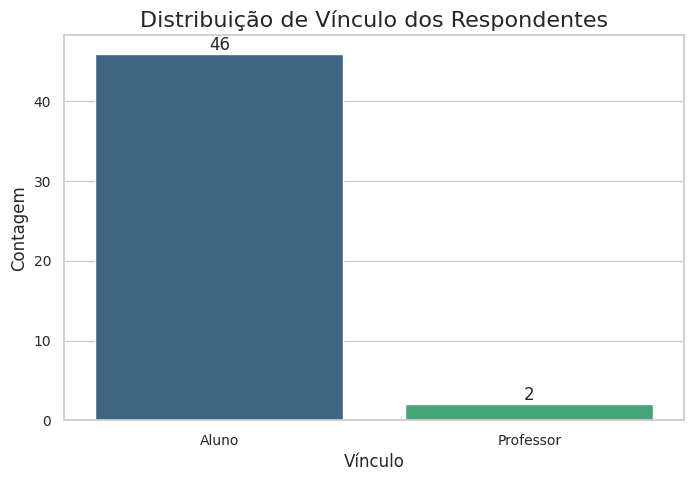

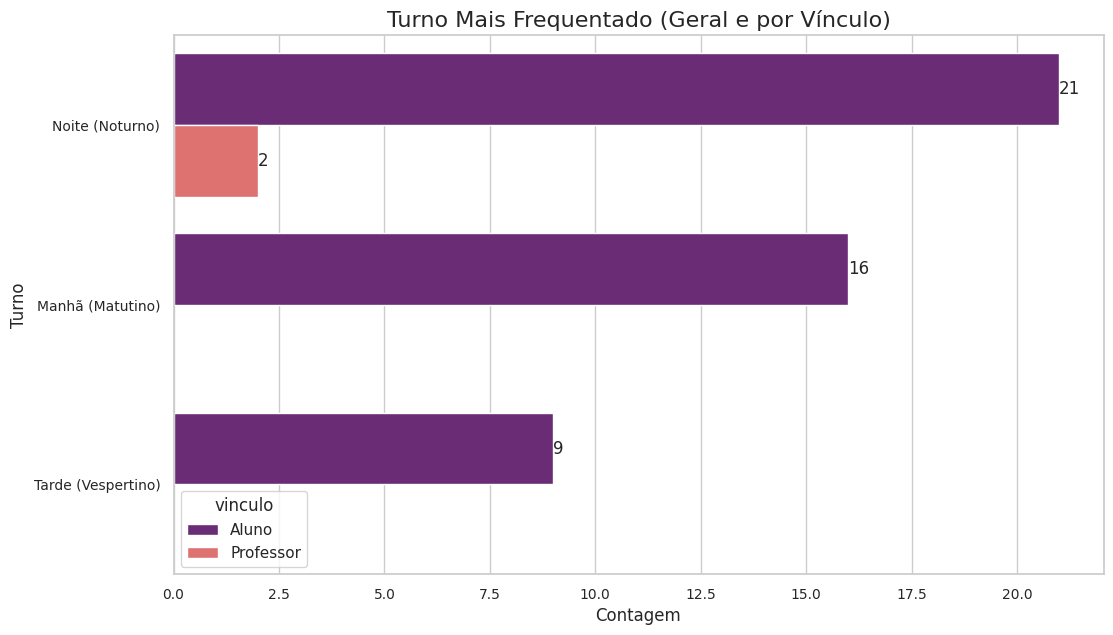

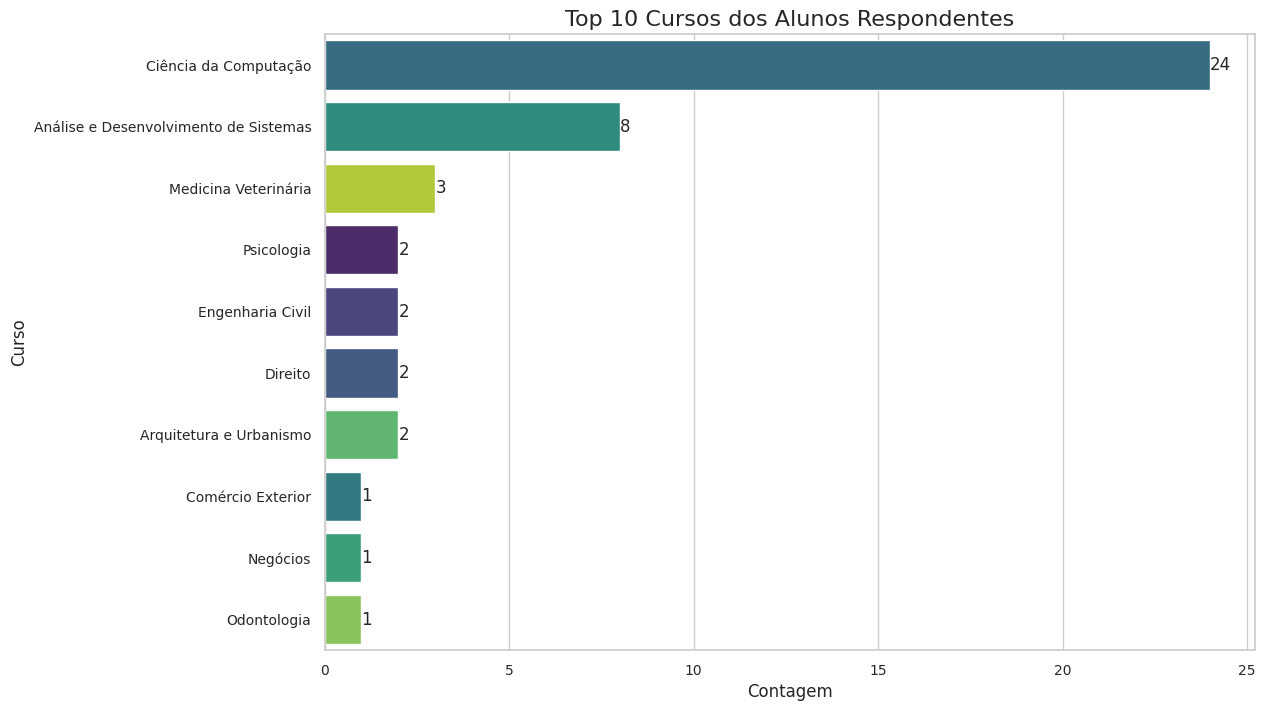

In [395]:
# Gráfico 1: Vínculo com a Unifor
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x=df['vinculo'],
    order=df['vinculo'].value_counts().index,
    palette='viridis',
    hue=df['vinculo'])
ax.set_title('Distribuição de Vínculo dos Respondentes', fontsize=16)
ax.set_xlabel('Vínculo')
ax.set_ylabel('Contagem')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

# Gráfico 2: Turno mais frequentado (geral e por vínculo)
plt.figure(figsize=(12, 7))
ax = sns.countplot(
    y=df['turno'],
    hue='vinculo',
    data=df,
    palette='magma')
ax.set_title('Turno Mais Frequentado (Geral e por Vínculo)', fontsize=16)
ax.set_xlabel('Contagem')
ax.set_ylabel('Turno')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

# Gráfico 3: Cursos com mais respondentes (alunos)
df_alunos = df[df['vinculo'] == 'Aluno']
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    y=df_alunos['curso'],
    order=df_alunos['curso'].value_counts().head(10).index,
    palette='viridis',
    hue=df_alunos['curso']
    )
ax.set_title('Top 10 Cursos dos Alunos Respondentes', fontsize=16)
ax.set_xlabel('Contagem')
ax.set_ylabel('Curso')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

### 3.2 Validação do Problema: Percepção do Sistema Atual
Agora, vamos validar a "dor" do nosso usuário. Acreditamos que, apesar de existir um serviço de achados e perdidos, a falta de informação e a baixa taxa de devolução são problemas crônicos. Vamos analisar o conhecimento geral sobre o serviço e as experiências de quem já o utilizou para confirmar se nossa solução é realmente necessária.

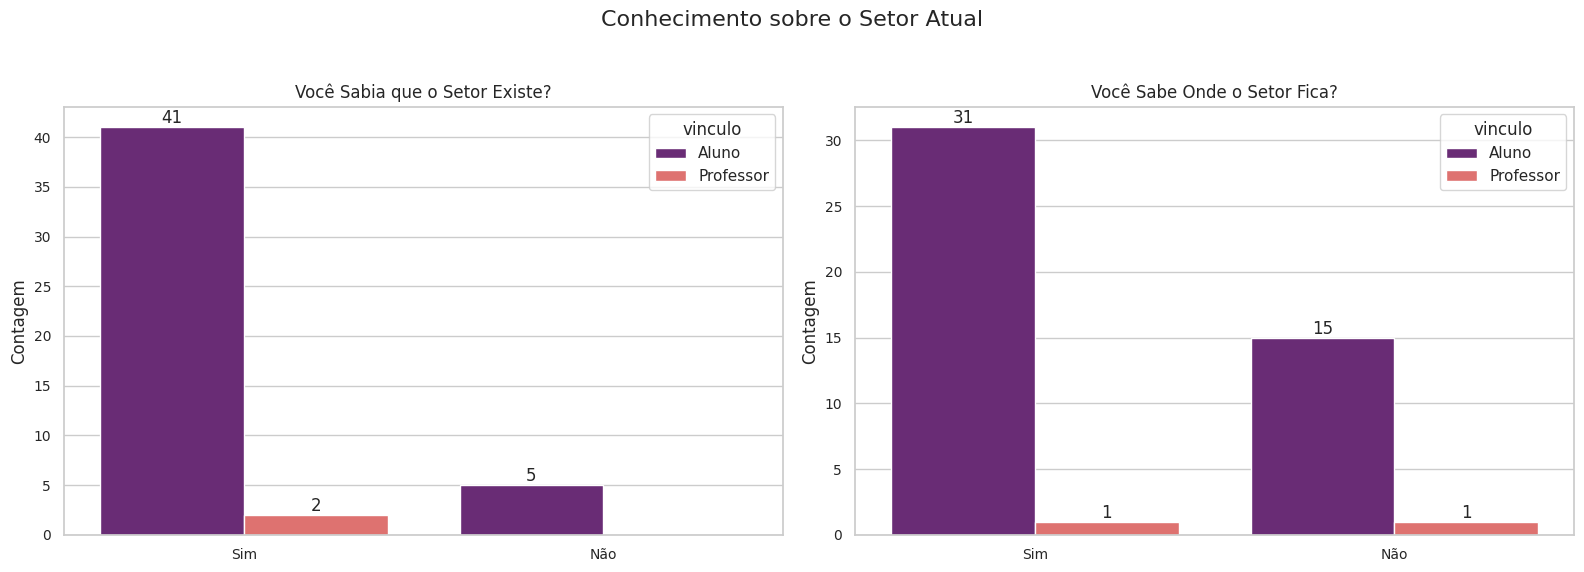

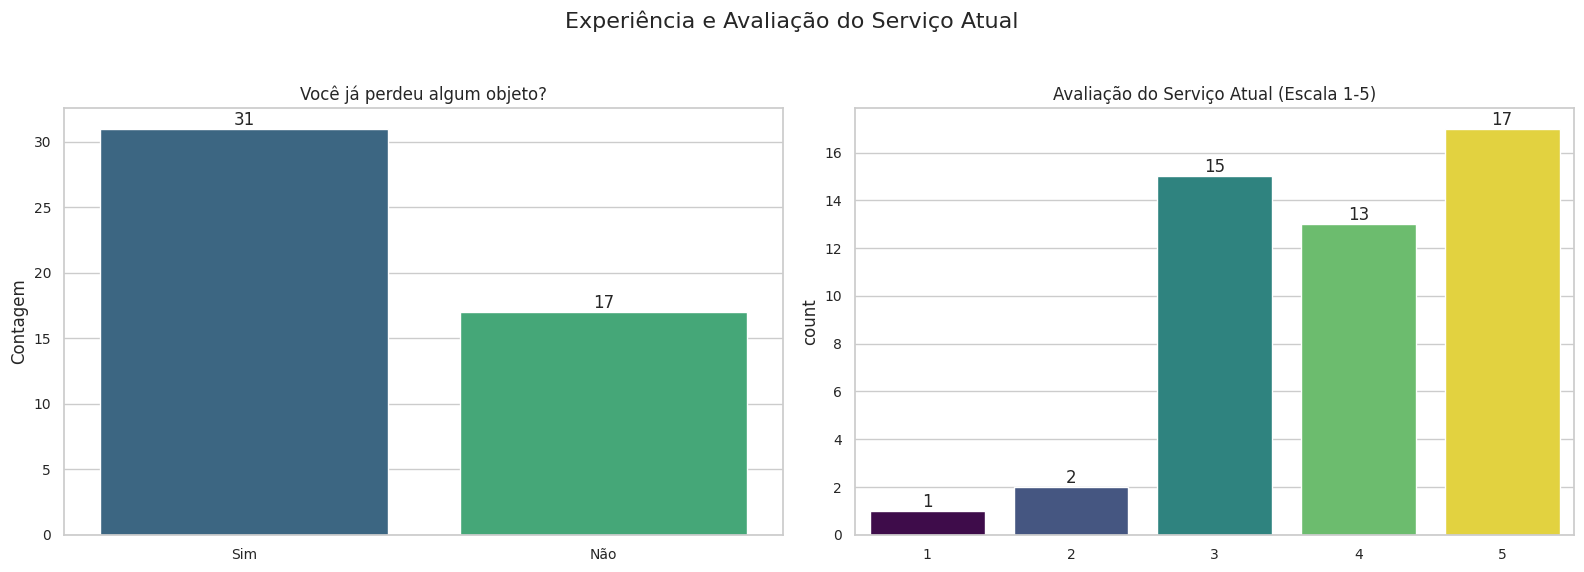

In [396]:
# Gráfico 1: Conhecimento sobre o setor de Achados e Perdidos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax0 = sns.countplot(ax=axes[0], x=df['sabia_setor_existe'], hue='vinculo', data=df, palette='magma')
axes[0].set_title('Você Sabia que o Setor Existe?')
axes[0].set_xlabel('')
axes[0].set_ylabel('Contagem')

for container in ax0.containers:
    ax0.bar_label(container)

ax1 = sns.countplot(ax=axes[1], x=df['sabe_localizacao_setor'], hue='vinculo', data=df, palette='magma')
axes[1].set_title('Você Sabe Onde o Setor Fica?')
axes[1].set_xlabel('')
axes[1].set_ylabel('Contagem')
plt.suptitle('Conhecimento sobre o Setor Atual', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for container in ax1.containers:
    ax1.bar_label(container)

plt.show()

# Gráfico 2: Experiência de Perda e Avaliação do Serviço
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax0 = sns.countplot(ax=axes[0], x=df['perdeu_objeto'], palette='viridis',hue=df['perdeu_objeto'])
axes[0].set_title('Você já perdeu algum objeto?')
axes[0].set_ylabel('Contagem')
axes[0].set_xlabel('')

for container in ax0.containers:
    ax0.bar_label(container)

ax1 = sns.countplot(ax=axes[1], x=df['avaliacao_servico_atual'], palette='viridis',hue=df['avaliacao_servico_atual'],legend=False)
axes[1].set_title('Avaliação do Serviço Atual (Escala 1-5)')
axes[1].set_xlabel('')
for container in ax1.containers:
    ax1.bar_label(container)

plt.suptitle('Experiência e Avaliação do Serviço Atual', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [397]:
# Esta função nos ajudará a analisar colunas onde o usuário podia marcar várias opções
def analisar_respostas_multiplas(serie, titulo):
    # Processa a string: remove nulos, separa por vírgula, remove espaços e conta as ocorrências
    respostas = serie.dropna().str.split(',').explode().str.strip().str.capitalize()
    contagem = Counter(respostas)

    # Cria um DataFrame para facilitar a visualização
    df_contagem = pd.DataFrame(contagem.items(), columns=['Item', 'Contagem']).sort_values('Contagem', ascending=False)

    # Gera o gráfico
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Contagem', y='Item', data=df_contagem.head(10), palette='viridis',hue="Contagem",legend=False)
    ax.set_title(titulo, fontsize=16)
    ax.set_xlabel('Número de Menções')
    ax.set_ylabel('')

    for container in ax.containers:
      ax.bar_label(container)

    plt.show()
    return df_contagem

### 3.3 Dificuldades Atuais e Funcionalidades Desejadas

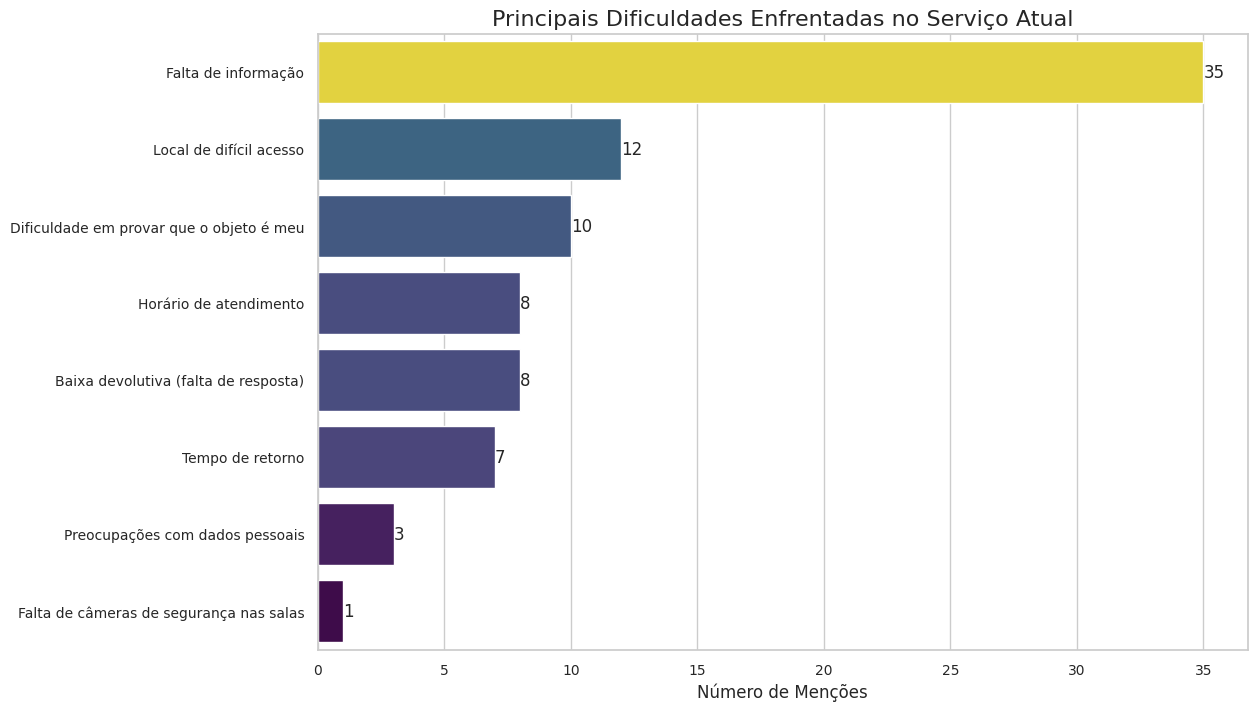

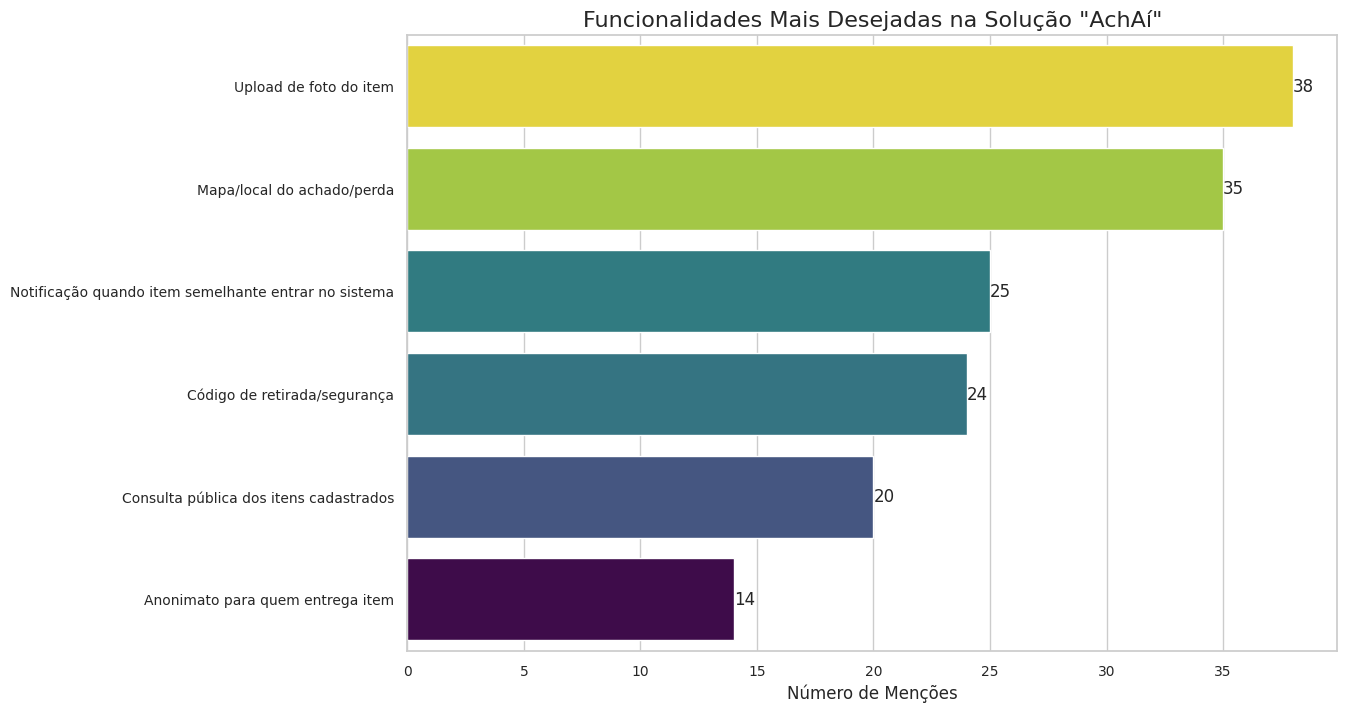

In [398]:
# Gráfico 1: Principais dificuldades enfrentadas com o sistema atual
df_dificuldades = analisar_respostas_multiplas(df[df['dificuldades_atuais'] != 'Não se aplica']['dificuldades_atuais'], 'Principais Dificuldades Enfrentadas no Serviço Atual')

# Gráfico 2: Funcionalidades mais desejadas para a nova solução
df_funcionalidades = analisar_respostas_multiplas(df['funcionalidades_desejadas'], 'Funcionalidades Mais Desejadas na Solução "AchAí"')

### 3.4 Validação da Solução Proposta
Qual o potencial de aceitação e uso da nova ferramenta?

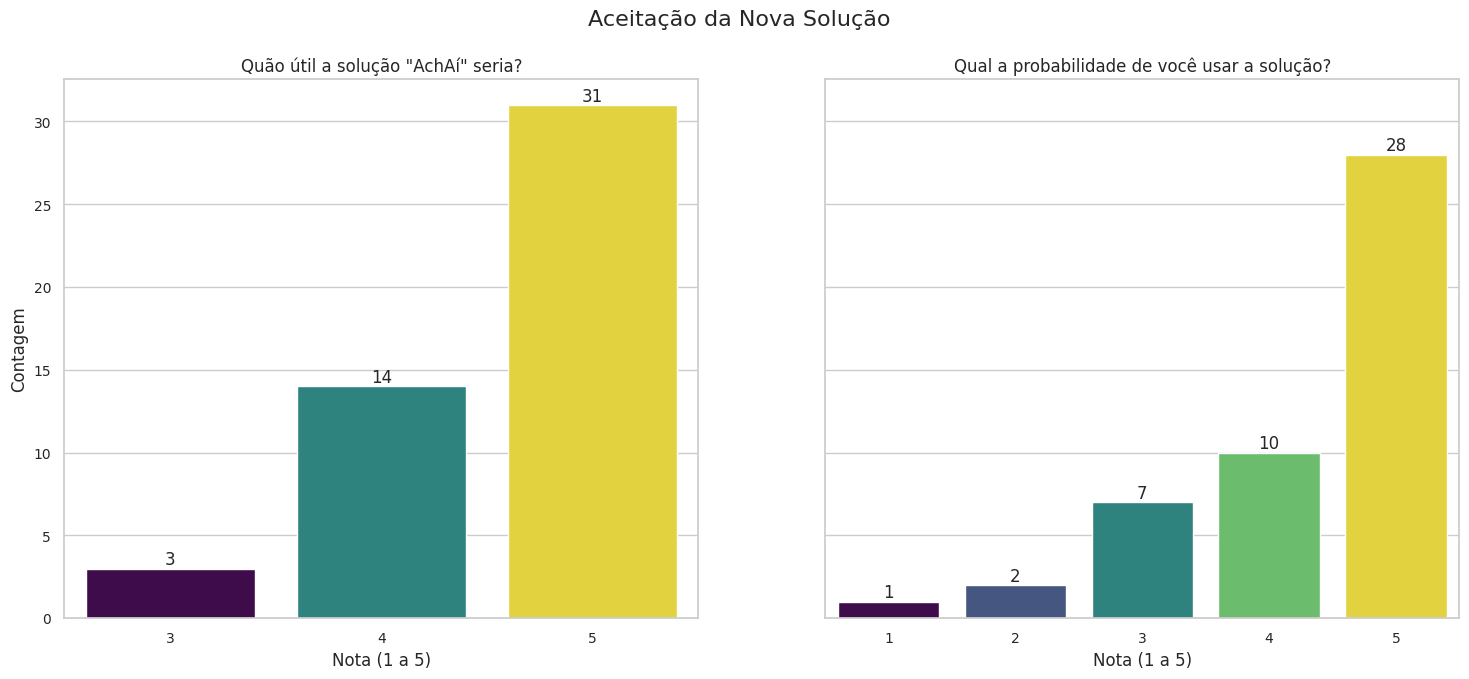

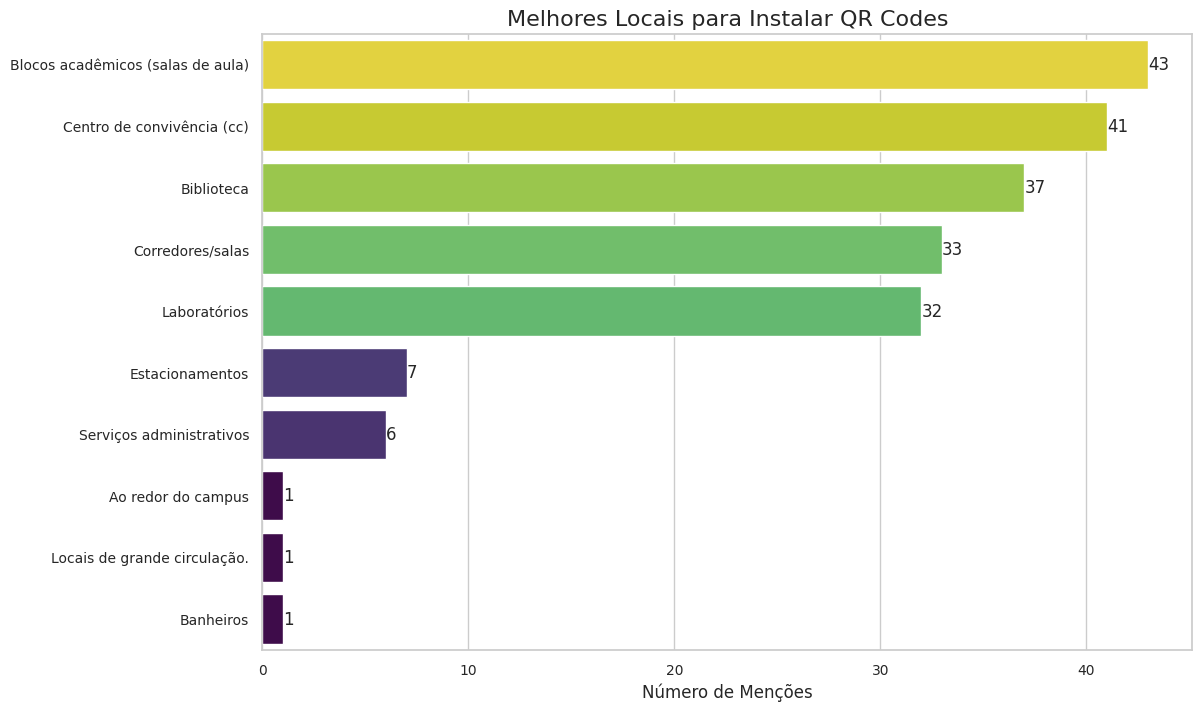

In [404]:
# Gráfico 1: Utilidade percebida e probabilidade de uso
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
ax0 = sns.countplot(ax=axes[0], x='utilidade_solucao', data=df, palette='viridis',hue="utilidade_solucao",legend=False)
axes[0].set_title('Quão útil a solução "AchAí" seria?')
axes[0].set_xlabel('Nota (1 a 5)')
axes[0].set_ylabel('Contagem')

for container in ax0.containers:
  ax0.bar_label(container)

ax1 = sns.countplot(ax=axes[1], x='probabilidade_uso_solucao', data=df, palette='viridis',hue="probabilidade_uso_solucao",legend=False)
axes[1].set_title('Qual a probabilidade de você usar a solução?')
axes[1].set_xlabel('Nota (1 a 5)')
axes[1].set_ylabel('')
plt.suptitle('Aceitação da Nova Solução', fontsize=16)

for container in ax1.containers:
  ax1.bar_label(container)

plt.show()

# Gráfico 2: Locais mais úteis para os QR Codes
df_locais_qr = analisar_respostas_multiplas(df['locais_qr_codes'], 'Melhores Locais para Instalar QR Codes')

### 3.5 Aprofundando a Análise: Cruzando Variáveis
Uma análise descritiva é importante, mas os insights mais ricos surgem quando cruzamos informações para entender o comportamento dos usuários. Vamos investigar duas questões:
1. Qual o perfil dos usuários que estão mais propensos a adotar nossa solução?
2. A dificuldade de "Falta de informação" se correlaciona com uma avaliação ruim do serviço atual?

In [400]:
# Análise 1: Perfil dos "Early Adopters"
print("--- Perfil dos Usuários com Alta Probabilidade de Adoção ---")
# Filtramos o DataFrame para pegar apenas respondentes que deram nota 4 ou 5 para a probabilidade de uso
early_adopters_df = df[df['probabilidade_uso_solucao'] >= 4]

# Analisando o perfil desse grupo específico
print(f"Total de {len(early_adopters_df)} respondentes com alta probabilidade de adoção.")

# Análise por Vínculo

vinculo_perfil = early_adopters_df['vinculo'].value_counts().to_frame('Contagem')
vinculo_perfil['Porcentagem (%)'] = (early_adopters_df['vinculo'].value_counts(normalize=True) * 100).round(2)
display(vinculo_perfil)

# Análise por Experiência de Perda

perda_perfil = early_adopters_df['perdeu_objeto'].value_counts().to_frame('Contagem')
perda_perfil['Porcentagem (%)'] = (early_adopters_df['perdeu_objeto'].value_counts(normalize=True) * 100).round(2)
display(perda_perfil)

avalicao_servico_atual = early_adopters_df['avaliacao_servico_atual'].value_counts().to_frame('Contagem')
avalicao_servico_atual['Porcentagem (%)'] = (early_adopters_df['avaliacao_servico_atual'].value_counts(normalize=True) * 100).round(2)
display(avalicao_servico_atual)

--- Perfil dos Usuários com Alta Probabilidade de Adoção ---
Total de 38 respondentes com alta probabilidade de adoção.


,Contagem,Porcentagem (%)
vinculo,,
Aluno,37,97.37
Professor,1,2.63


,Contagem,Porcentagem (%)
perdeu_objeto,,
Sim,23,60.53
Não,15,39.47


,Contagem,Porcentagem (%)
avaliacao_servico_atual,,
5,14,36.84
3,12,31.58
4,9,23.68
2,2,5.26
1,1,2.63


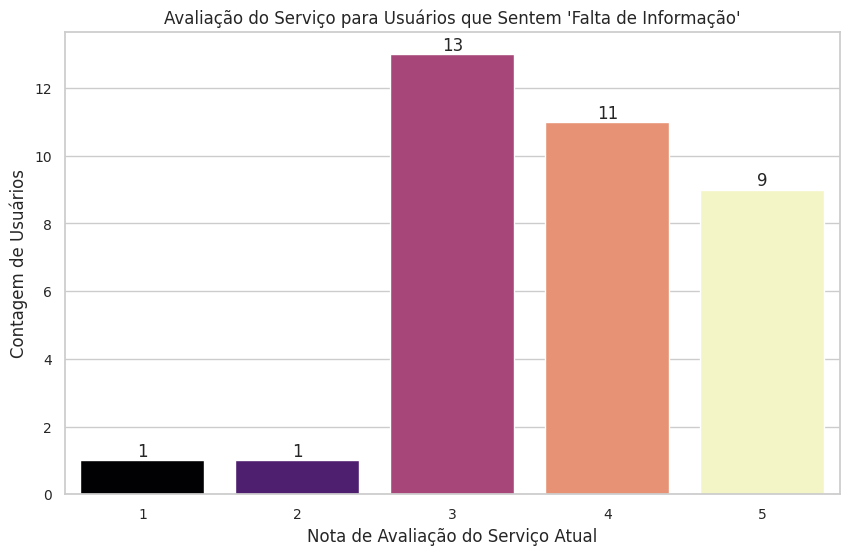

In [401]:
# Análise 2: Relação entre a principal Dificuldade e a Avaliação do serviço

falta_info_df = df[df['dificuldades_atuais'].str.contains("Falta de informação", na=False)]

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=falta_info_df, x='avaliacao_servico_atual', palette='magma',hue="avaliacao_servico_atual",legend=False)
plt.title("Avaliação do Serviço para Usuários que Sentem 'Falta de Informação'")
plt.xlabel("Nota de Avaliação do Serviço Atual")
plt.ylabel("Contagem de Usuários")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## 4. Conclusões e Insights para o Projeto
*A análise dos dados da pesquisa fornece uma base sólida para a validação e o direcionamento do projeto "AchAí".*

* **Validação do Problema:** A necessidade de uma nova solução é clara. Cerca de **65%** (`31 de 48`) dos respondentes já perderam algum item na universidade. O serviço atual tem pontos fracos evidentes, com a **"Falta de informação"** sendo a dificuldade mais citada.

* **Forte Aceitação da Solução:** A solução "AchAí" foi extremamente bem recebida. A nota média para **utilidade foi de 4.7** e para **probabilidade de uso, 4.5**, indicando alto potencial de adesão.

* **Priorização de Funcionalidades:** As funcionalidades mais solicitadas devem guiar o desenvolvimento inicial. O top 3 desejado foi:
    1.  **Upload de foto do item**
    2.  **Notificação quando item semelhante entrar no sistema**
    3.  **Consulta pública dos itens cadastrados**

* **Direcionamento Estratégico:** Para a implantação, os QR Codes devem ser priorizados nos locais mais votados:
    1.  **Blocos acadêmicos (Salas de Aula)**
    2.  **Centro de Convivência (CC)**
    3.  **Biblioteca**

* **Perfil dos Early Adopters:** A análise do primeiro grupo nos mostra as características dominantes das pessoas mais interessadas na solução "AchAí". Podemos ver, por exemplo, que a maioria são alunos que já tiveram a experiência de perder um objeto e que tendem a dar notas medianas ou baixas para o serviço atual. Isso confirma que estamos mirando no público certo.

* **Dor vs. Satisfação:** O segundo gráfico é revelador. Ele mostra que o grupo de usuários que reclama da "Falta de informação" concentra suas avaliações nas notas mais baixas (predominantemente 3, com algumas avaliações 1 e 2). Isso cria uma forte evidência quantitativa de que a má comunicação é um dos principais fatores para a insatisfação geral, validando a necessidade de uma solução como a "AchAí".

**Próximos Passos:** Utilizaremos estes insights para refinar os requisitos da landing page e dos formulários, e para planejar a campanha de divulgação focada nos locais e canais de comunicação mais relevantes para a comunidade Unifor.